# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 4.9 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: plotly
    Found existing installation: plotly 5.9.0
    Uninstalling plotly-5.9.0:
      Successfully uninstalled plotly-5.9.0
Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [83]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [91]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [7]:
shape = df_data.shape
print(f'Shape of df_data: {shape}')

Shape of df_data: (4324, 9)


In [8]:
num_rows, num_columns = shape[0], shape[1]
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

Number of rows: 4324
Number of columns: 9


In [9]:
column_names = df_data.columns
print(f'Column names: {column_names}')

Column names: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [10]:
nan_values = df_data.isna().any().any()
duplicates = df_data.duplicated().any()
print(f'Are there any NaN values? {nan_values}')
print(f'Are there any duplicates? {duplicates}')

Are there any NaN values? True
Are there any duplicates? False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [11]:
# Check for missing values in each column
missing_values = df_data.isna().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64


In [15]:
# Remove the 'Price' column with missing values
df_data.drop('Price', axis=1, inplace=True)

In [16]:
# Check for duplicates
duplicates = df_data.duplicated()
print("Duplicates:")
print(duplicates)

Duplicates:
0       False
1       False
2       False
3       False
4       False
        ...  
4319    False
4320    False
4321    False
4322    False
4323    False
Length: 4324, dtype: bool


In [17]:
# Remove duplicate rows
df_data.drop_duplicates(inplace=True)

## Descriptive Statistics

In [18]:
descriptive_stats = df_data.describe()
print(descriptive_stats)

       Unnamed: 0.1  Unnamed: 0
count      4,324.00    4,324.00
mean       2,161.50    2,161.50
std        1,248.38    1,248.38
min            0.00        0.00
25%        1,080.75    1,080.75
50%        2,161.50    2,161.50
75%        3,242.25    3,242.25
max        4,323.00    4,323.00


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [19]:
launch_counts = df_data['Organisation'].value_counts()

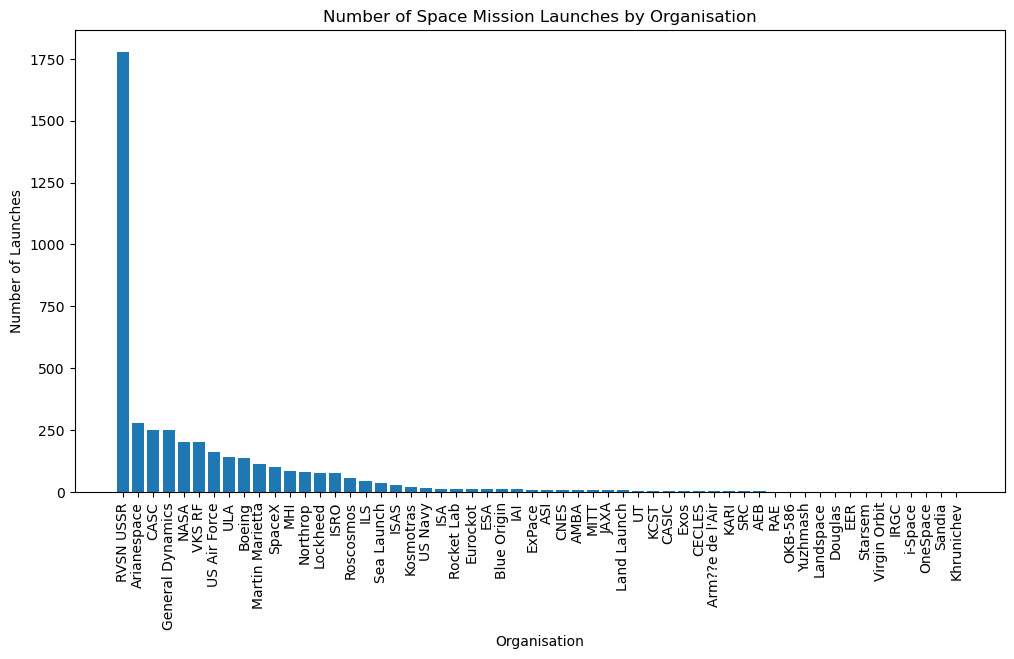

In [20]:
plt.figure(figsize=(12, 6))
plt.bar(launch_counts.index, launch_counts.values)
plt.xlabel('Organisation')
plt.ylabel('Number of Launches')
plt.title('Number of Space Mission Launches by Organisation')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [21]:
active_rockets = (df_data['Rocket_Status'] == 'StatusActive').sum()
retired_rockets = len(df_data) - active_rockets

In [22]:
print(f"Number of Active Rockets: {active_rockets}")
print(f"Number of Retired Rockets: {retired_rockets}")

Number of Active Rockets: 790
Number of Retired Rockets: 3534


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [24]:
successful_missions = (df_data['Mission_Status'] == 'Success').sum()
failed_missions = (df_data['Mission_Status'] == 'Failure').sum()

In [25]:
print(f"Number of Successful Missions: {successful_missions}")
print(f"Number of Failed Missions: {failed_missions}")

Number of Successful Missions: 3879
Number of Failed Missions: 339


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [31]:
# Filter out rows with missing price values
df_data_clean = df_data.dropna(subset=['Price'])
# Extract the 'Price' column as a list
prices = df_data_clean['Price']

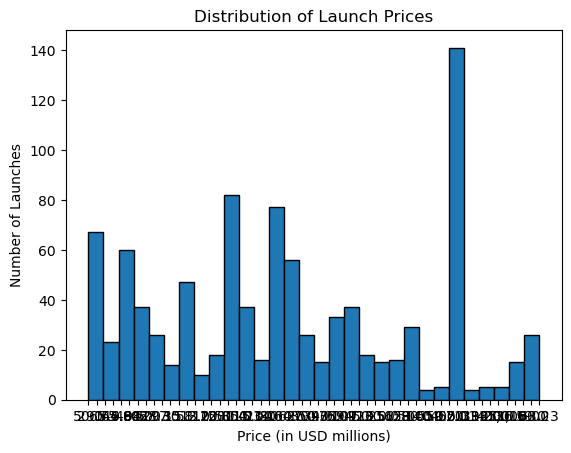

In [32]:
# Create a histogram
plt.hist(prices, bins=30, edgecolor='k')
plt.xlabel('Price (in USD millions)')
plt.ylabel('Number of Launches')
plt.title('Distribution of Launch Prices')
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [153]:
df_data['Country'] = df_data['Location'].apply(lambda x: x.split(', ')[-1])

In [154]:
replacement_dict = {
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA'
}

df_data['Country'].replace(replacement_dict, inplace=True)


In [155]:
df_data['Country'].unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russian Federation', 'Iran', 'France', 'India', 'North Korea',
       'Pacific Ocean', 'South Korea', 'Brazil', 'Kenya', 'Australia'],
      dtype=object)

In [156]:
# Calculate the number of launches per organisation
launch_counts = df_data['Organisation'].value_counts().reset_index()
launch_counts.columns = ['Organisation', 'Number_of_Launches']


In [98]:
# Create a Choropleth map
fig = px.choropleth(launch_counts,
                    locations="Organisation",
                    color="Number_of_Launches",
                    hover_name="Organisation",
                    locationmode="ISO-3",
                    color_continuous_scale="matter"  
                   )

# Use a Choropleth Map to Show the Number of Failures by Country


In [158]:
# Filter the dataset for mission failures
failures_data = df_data[df_data['Mission_Status'] == 'Failure']
failure_counts = failures_data['Country_Code'].value_counts().reset_index()
failure_counts.columns = ['Country_Code', 'Number_of_Failures']

In [159]:
# Create a Choropleth map
fig = px.choropleth(failure_counts,
                    locations="Country_Code",
                    color="Number_of_Failures",
                    hover_name="Country_Code",
                    locationmode="ISO-3",
                    color_continuous_scale="matter"  
                   )

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [26]:
# Create a temporary DataFrame to count the number of missions
count_df = df_data.groupby(['Location', 'Organisation', 'Mission_Status']).size().reset_index(name='Mission_Count')

In [27]:
# Create a Plotly Sunburst Chart
fig = px.sunburst(count_df, 
                 path=['Location', 'Organisation', 'Mission_Status'],
                 values='Mission_Count',  
                 title="Sunburst Chart of Countries, Organisations, and Mission Status")

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [33]:
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')
df_data = df_data.dropna(subset=['Price'])

In [34]:
total_spending_by_organisation = df_data.groupby('Organisation')['Price'].sum()
print(total_spending_by_organisation)

Organisation
Arianespace       16,345.00
Boeing             1,241.00
CASC               6,340.26
EER                   20.00
ESA                   37.00
Eurockot             543.40
ExPace                28.30
ILS                1,320.00
ISRO               2,177.00
JAXA                 168.00
Kosmotras            638.00
Lockheed             280.00
MHI                3,532.50
Martin Marietta      721.40
NASA              61,200.00
Northrop           3,930.00
Rocket Lab            97.50
Roscosmos          1,187.50
Sandia                15.00
SpaceX             5,444.00
ULA               14,798.00
US Air Force       1,550.92
VKS RF             1,548.90
Virgin Orbit          12.00
Name: Price, dtype: float64


# Analyse the Amount of Money Spent by Organisation per Launch

In [36]:
avg_price_by_organisation = df_data.groupby('Organisation')['Price'].mean()

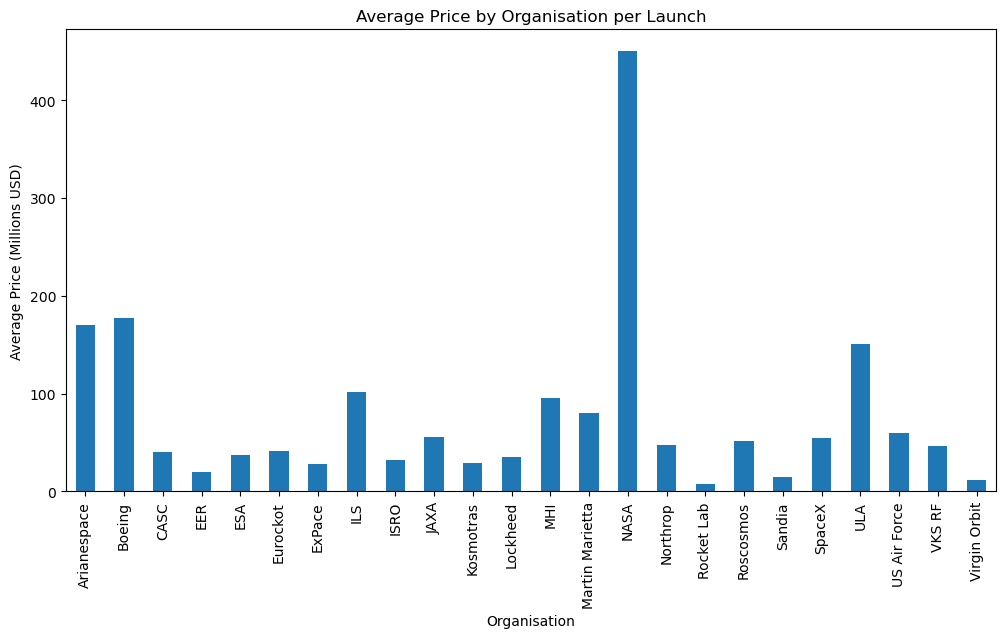

In [37]:
plt.figure(figsize=(12, 6))
avg_price_by_organisation.plot(kind='bar')
plt.xlabel('Organisation')
plt.ylabel('Average Price (Millions USD)')
plt.title('Average Price by Organisation per Launch')
plt.xticks(rotation=90)
plt.show()

# Chart the Number of Launches per Year

In [49]:
df_data['Date'] = df_data['Date'].astype(str)
df_data['Year'] = df_data['Date'].str.extract(r'(\d{4})')
df_data['Year'] = df_data['Year'].astype(int)
print(df_data['Year'])

0       2020
1       2020
3       2020
4       2020
5       2020
        ... 
3855    1966
3971    1965
3993    1965
4000    1964
4020    1964
Name: Year, Length: 949, dtype: int64


In [52]:
launches_per_year = df_data['Year'].value_counts().sort_index()

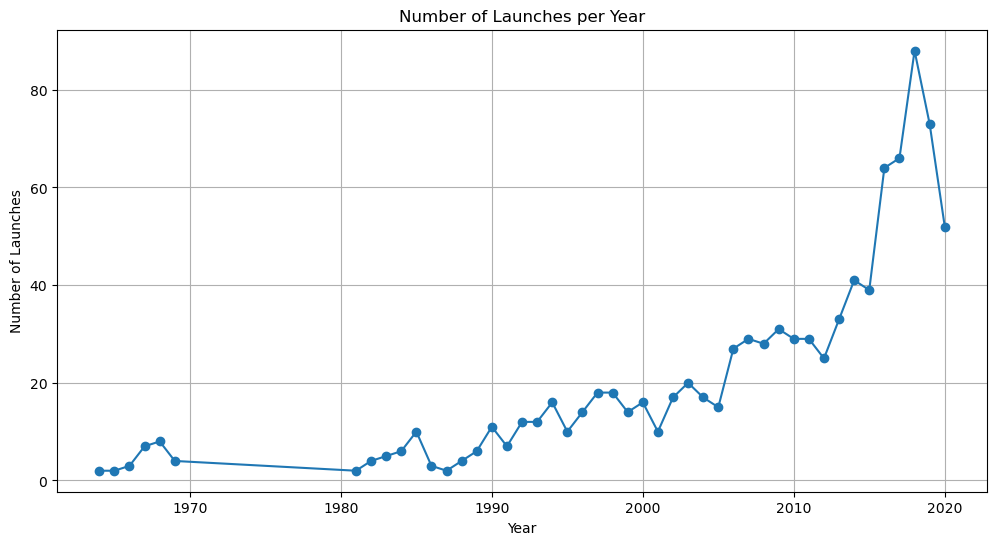

In [53]:
plt.figure(figsize=(12, 6))
launches_per_year.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Launches per Year')
plt.grid()
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [59]:
df_data['Month'] = df_data['Date'].str[5:7]
print(df_data[['Date', 'Month']].head())

                        Date Month
0  2020-08-07 05:12:00+00:00    08
1  2020-08-06 04:01:00+00:00    08
3  2020-07-30 21:25:00+00:00    07
4  2020-07-30 11:50:00+00:00    07
5  2020-07-25 03:13:00+00:00    07


In [60]:
# Create a new column for grouping by year and month
df_data['YearMonth'] = df_data['Year'].astype(str) + '-' + df_data['Month'].astype(str).str.zfill(2)

# Group by year and month, count the number of launches
monthly_launches = df_data['YearMonth'].value_counts().sort_index()

# Calculate the rolling average (e.g., 12-month rolling average)
rolling_average = monthly_launches.rolling(window=12).mean()

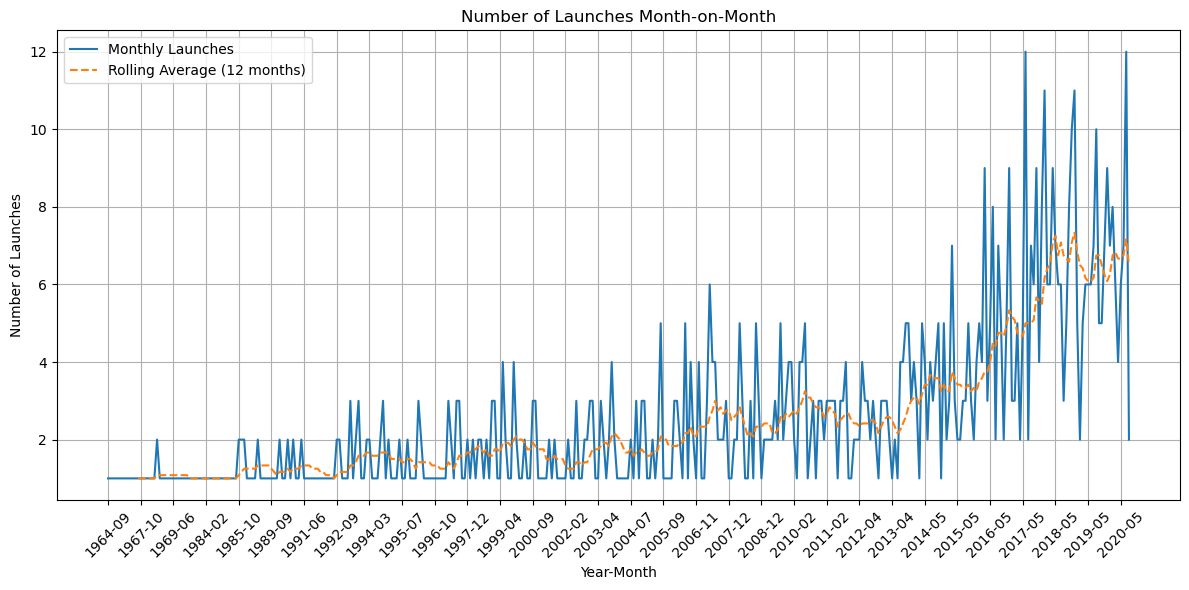

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_launches.index, monthly_launches.values, label='Monthly Launches')
plt.plot(rolling_average.index, rolling_average.values, label='Rolling Average (12 months)', linestyle='--')
plt.xlabel('Year-Month')
plt.ylabel('Number of Launches')
plt.title('Number of Launches Month-on-Month')
plt.xticks(range(0, len(monthly_launches), 12), monthly_launches.index[::12], rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()  
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

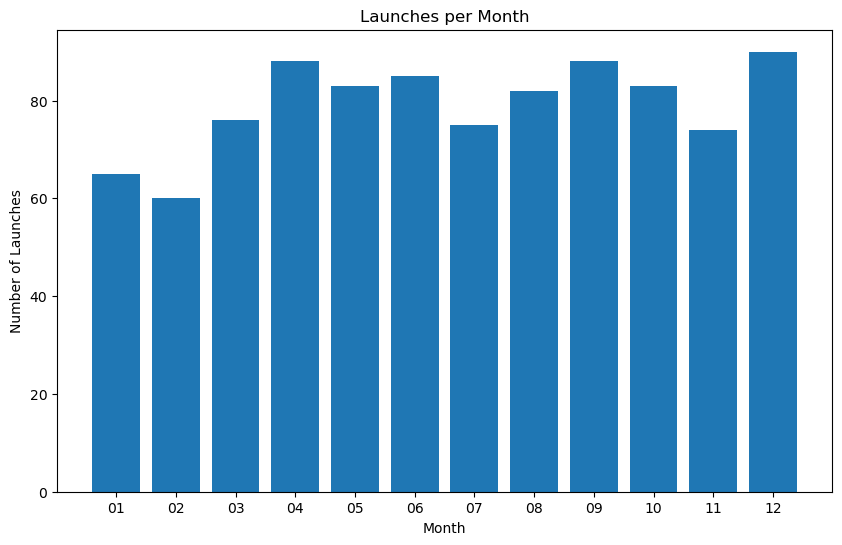

In [66]:
monthly_launch_counts = df_data['Month'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_launch_counts.index, monthly_launch_counts)
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.title('Launches per Month')
plt.show()

In [67]:
# Find the most popular and least popular months
most_popular_month = monthly_launch_counts.idxmax()
least_popular_month = monthly_launch_counts.idxmin()

# Output the results
print(f'Most popular month for launches: {most_popular_month}')
print(f'Least popular month for launches: {least_popular_month}')

Most popular month for launches: 12
Least popular month for launches: 02


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [71]:
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')
average_price_by_year = df_data.groupby('Year')['Price'].mean()

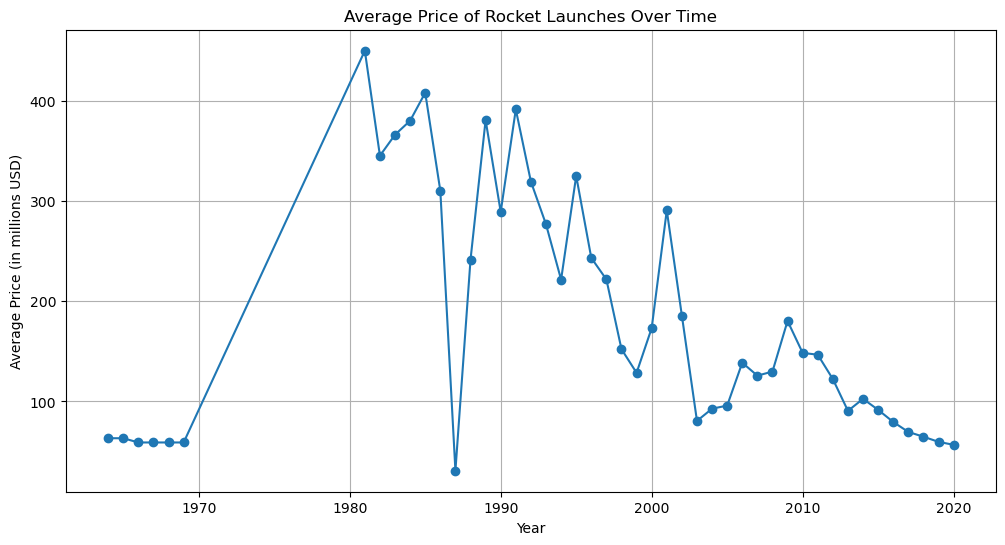

In [72]:
plt.figure(figsize=(12, 6))
average_price_by_year.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Price (in millions USD)')
plt.title('Average Price of Rocket Launches Over Time')
plt.grid(True)

plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [75]:

# Get the top 10 organizations with the most launches
top_10_organizations = df_data['Organisation'].value_counts().nlargest(10).index

# Filter the data for the top 10 organizations
df_top_10 = df_data[df_data['Organisation'].isin(top_10_organizations)]

# Group by organization and year and count the number of launches
launch_count_by_org_year = df_top_10.groupby(['Organisation', 'Year']).size().unstack().T

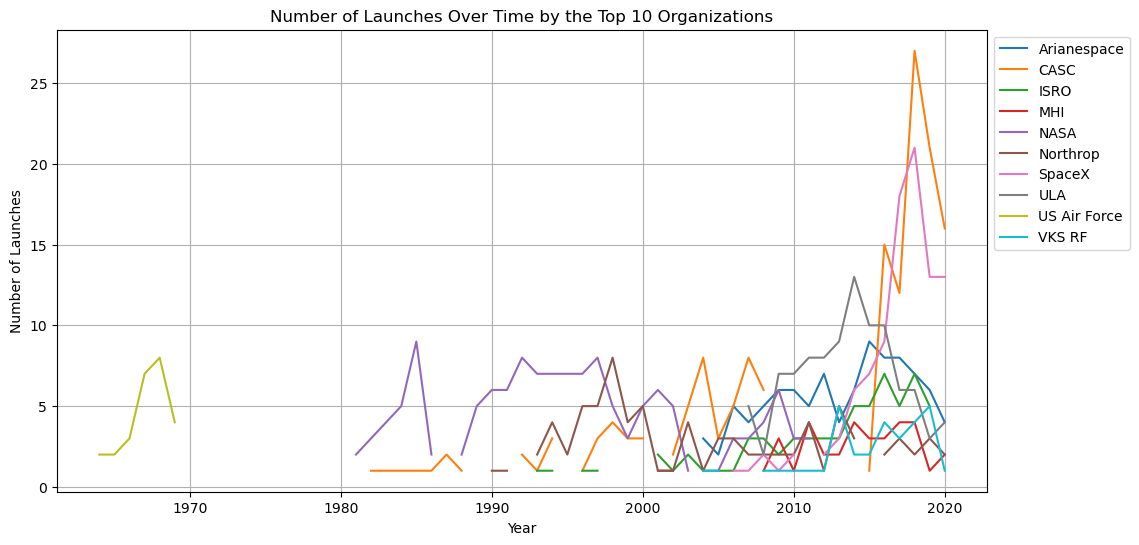

In [218]:
plt.figure(figsize=(12, 6))
for organization in launch_count_by_org_year.columns:
    plt.plot(launch_count_by_org_year.index, launch_count_by_org_year[organization], label=organization)

plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Launches Over Time by the Top 10 Organizations')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [185]:
df_data = pd.read_csv('mission_launches.csv')
df_data['Date'] = df_data['Date'].astype(str)
df_data['Year'] = df_data['Date'].str.extract(r'(\d{4})')
df_data['Year'] = df_data['Year'].astype(int)
print(df_data['Year'])

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
4319    1958
4320    1958
4321    1957
4322    1957
4323    1957
Name: Year, Length: 4324, dtype: int64


In [186]:
df_data['Country'] = df_data['Location'].apply(lambda x: x.split(', ')[-1])

In [187]:
replacement_dict = {
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA'
}

df_data['Country'].replace(replacement_dict, inplace=True)


In [188]:
df_data['Country'].unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russian Federation', 'Iran', 'France', 'India', 'North Korea',
       'Pacific Ocean', 'South Korea', 'Brazil', 'Kenya', 'Australia'],
      dtype=object)

In [189]:
# Define the start and end years of the Cold War
cold_war_start_year = df_data['Year'].min()
cold_war_end_year = 1991  # The end of the Cold War

# Filter the dataset for missions during the Cold War
cold_war_data = df_data[(df_data['Year'] >= cold_war_start_year) & (df_data['Year'] <= cold_war_end_year)]

In [217]:
# Group the data by Year and Country and count the number of missions
missions_by_country_year = cold_war_data.groupby(['Year', 'Country'])['Organisation'].count().reset_index()
missions_by_country_year.columns = ['Year', 'Country', 'Number_of_Missions']

print(missions_by_country_year)

     Year             Country  Number_of_Missions
0    1957          Kazakhstan                   2
1    1957                 USA                   1
2    1958          Kazakhstan                   5
3    1958                 USA                  23
4    1959          Kazakhstan                   4
..    ...                 ...                 ...
182  1991              France                   8
183  1991               Japan                   3
184  1991          Kazakhstan                   4
185  1991  Russian Federation                  25
186  1991                 USA                  18

[187 rows x 3 columns]


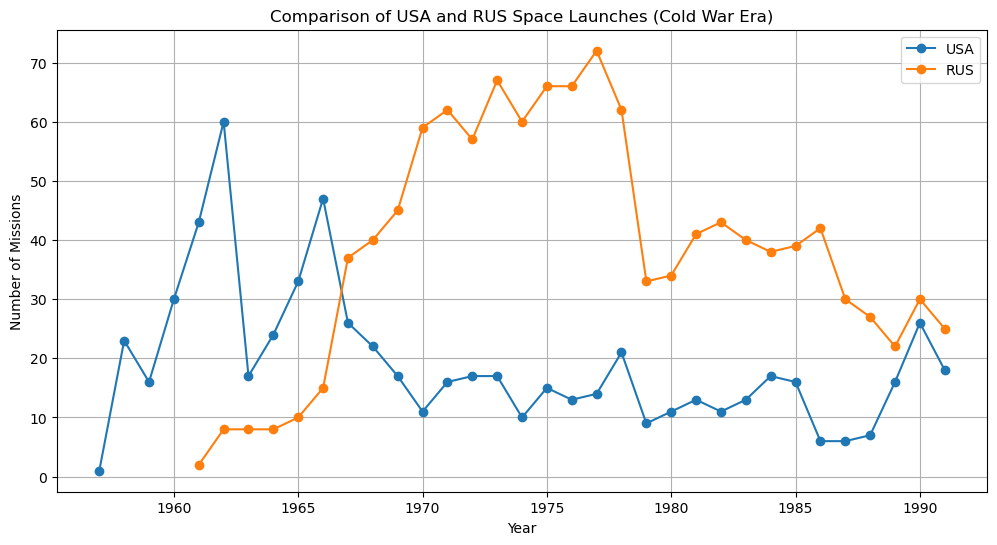

In [216]:
# Filter the data for USA and RUS 
usa_rus_data = missions_by_country_year[(missions_by_country_year['Country'] == 'USA') | (missions_by_country_year['Country'] == 'Russian Federation')]

plt.figure(figsize=(12, 6))
plt.plot(usa_rus_data[usa_rus_data['Country'] == 'USA']['Year'], usa_rus_data[usa_rus_data['Country'] == 'USA']['Number_of_Missions'], label='USA', marker='o')
plt.plot(usa_rus_data[usa_rus_data['Country'] == 'Russian Federation']['Year'], usa_rus_data[usa_rus_data['Country'] == 'Russian Federation']['Number_of_Missions'], label='RUS', marker='o')

plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.title('Comparison of USA and RUS Space Launches (Cold War Era)')
plt.legend()
plt.grid(True)
plt.show()


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [204]:
# Filter the data for the USA and the USSR 
countries_of_interest = ['USA', 'Russian Federation', 'Kazakhstan']
filtered_data = df_data[df_data['Country'].isin(countries_of_interest)]

labels = launch_counts['Country']
sizes = launch_counts['Number_of_Launches']

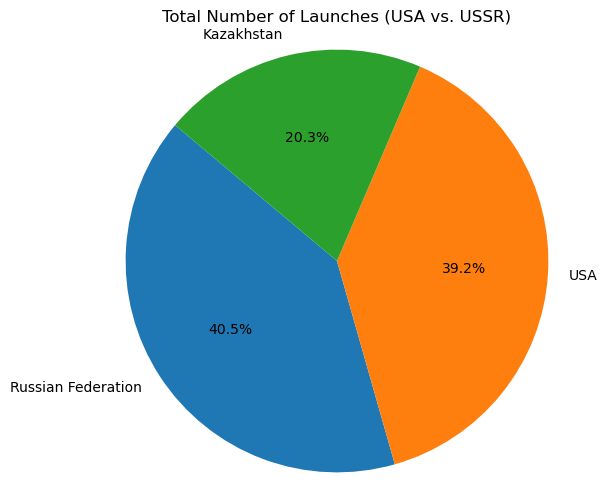

In [206]:
plt.figure(figsize=(6, 6))  # Adjust the figsize here
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Total Number of Launches (USA vs. USSR)')

plt.axis('equal')
plt.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [209]:
# Filter the data for USA and Russia
usa_data = usa_rus_data[usa_rus_data['Country'] == 'USA']
rus_data = usa_rus_data[usa_rus_data['Country'] == 'Russian Federation']

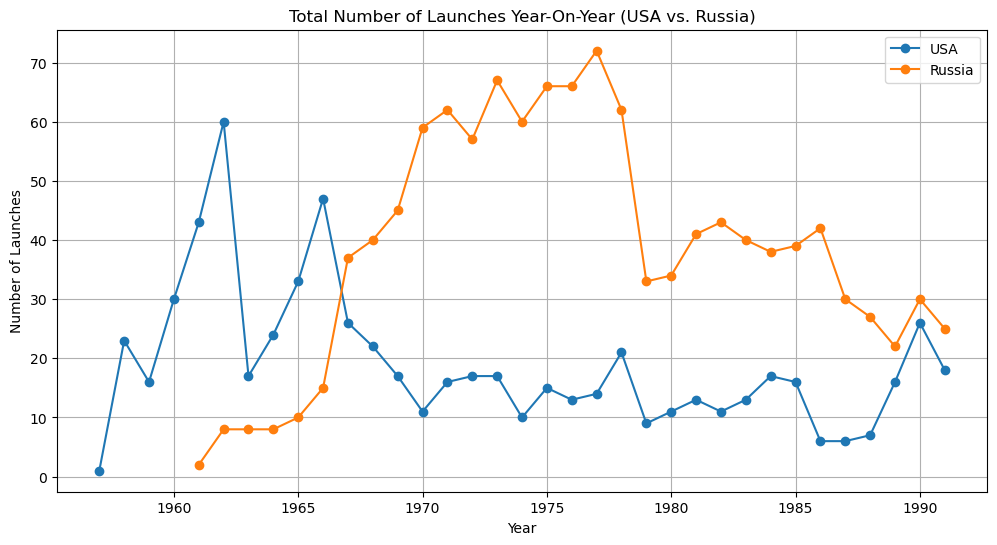

In [215]:
plt.figure(figsize=(12, 6))
plt.plot(usa_data['Year'], usa_data['Number_of_Missions'], label='USA', marker='o')
plt.plot(rus_data['Year'], rus_data['Number_of_Missions'], label='Russia', marker='o')

plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Total Number of Launches Year-On-Year (USA vs. Russia)')
plt.legend()
plt.grid(True)
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [212]:
failure_data = df_data[['Year', 'Mission_Status']]
failure_data = failure_data[~(failure_data['Mission_Status'] == 'Success')]
failures_by_year = failure_data.groupby('Year').size().reset_index(name='Total_Failures')

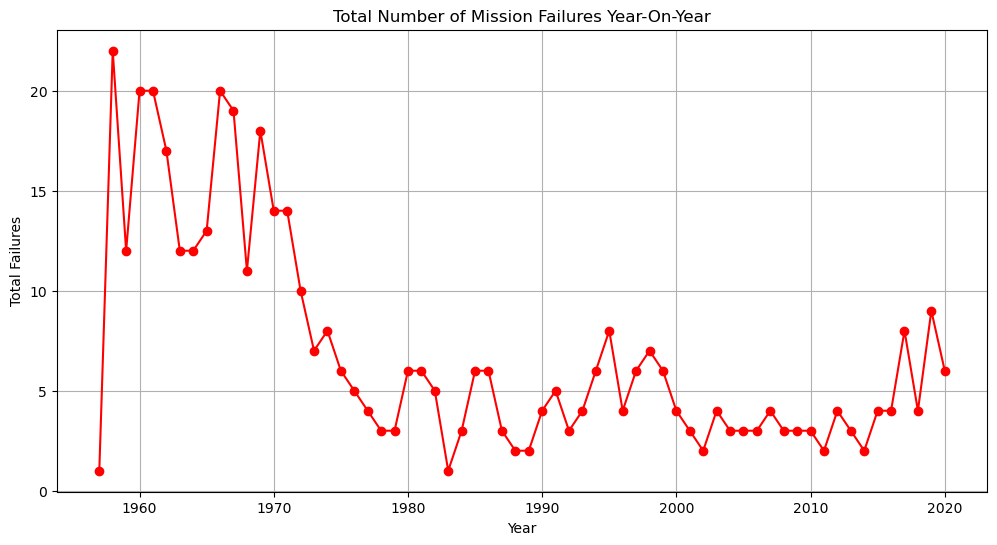

In [213]:
plt.figure(figsize=(12, 6))
plt.plot(failures_by_year['Year'], failures_by_year['Total_Failures'], marker='o', color='red')
plt.xlabel('Year')
plt.ylabel('Total Failures')
plt.title('Total Number of Mission Failures Year-On-Year')
plt.grid(True)
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [220]:
# Extract the 'Year' and 'Mission_Status' columns
status_data = df_data[['Year', 'Mission_Status']]

yearly_failure_percentage = status_data.groupby('Year')['Mission_Status'].apply(lambda x: (x == 'Failure').mean() * 100).reset_index(name='Failure_Percentage')


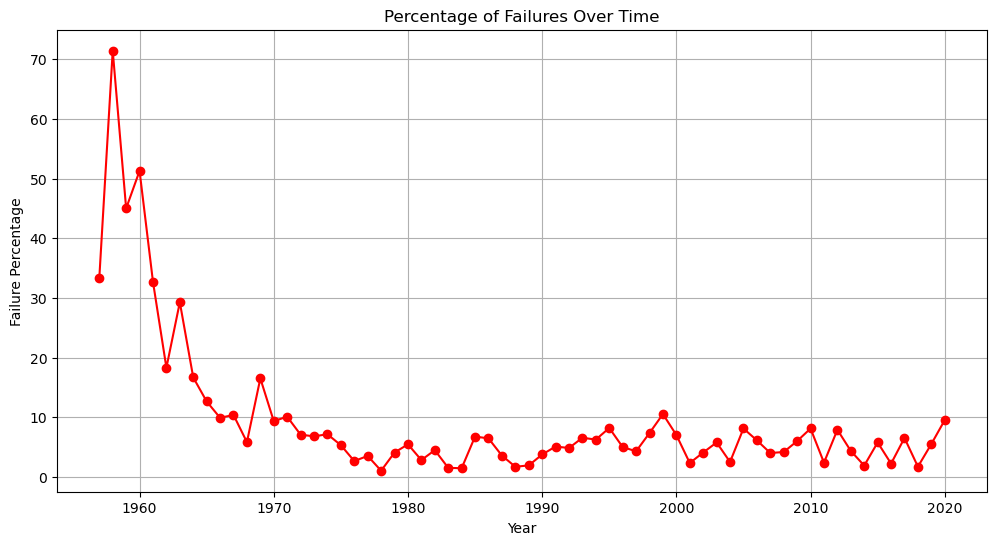

In [221]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_failure_percentage['Year'], yearly_failure_percentage['Failure_Percentage'], marker='o', color='red')
plt.xlabel('Year')
plt.ylabel('Failure Percentage')
plt.title('Percentage of Failures Over Time')
plt.grid(True)
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [225]:
launch_stats = df_data.groupby(['Year', 'Country', 'Mission_Status'])['Mission_Status'].count().reset_index(name='Count')
successful_launches = launch_stats[launch_stats['Mission_Status'] == 'Success']

In [226]:
country_with_most_launches = launch_stats[launch_stats.groupby(['Year'])['Count'].transform(max) == launch_stats['Count']]
country_with_most_successful_launches = successful_launches[successful_launches.groupby(['Year'])['Count'].transform(max) == successful_launches['Count']]

In [227]:
print("Country with the most total launches each year:")
print(country_with_most_launches)

print("Country with the most successful launches each year:")
print(country_with_most_successful_launches)

Country with the most total launches each year:
     Year     Country Mission_Status  Count
0    1957  Kazakhstan        Success      2
4    1958         USA        Failure     16
10   1959         USA        Failure      8
16   1960         USA        Success     16
22   1961         USA        Success     27
..    ...         ...            ...    ...
577  2016         USA        Success     26
592  2017         USA        Success     30
594  2018       China        Success     38
606  2019       China        Success     32
631  2020         USA        Success     20

[65 rows x 4 columns]
Country with the most successful launches each year:
     Year     Country Mission_Status  Count
0    1957  Kazakhstan        Success      2
6    1958         USA        Success      5
12   1959         USA        Success      6
16   1960         USA        Success     16
22   1961         USA        Success     27
..    ...         ...            ...    ...
577  2016         USA        Success    

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [242]:
df_data['Year'] = df_data['Year'].astype(int)
filtered_data = df_data[df_data['Year'] >= 1970]

yearly_organization_counts = filtered_data.groupby(['Year', 'Organisation'])['Year'].count().unstack()
dominant_organizations = yearly_organization_counts.idxmax(axis=1)

In [243]:
data = pd.DataFrame({'Year': dominant_organizations.index, 'Organization': dominant_organizations.values})
palette = sns.color_palette("husl", n_colors=len(data['Organization'].unique()))

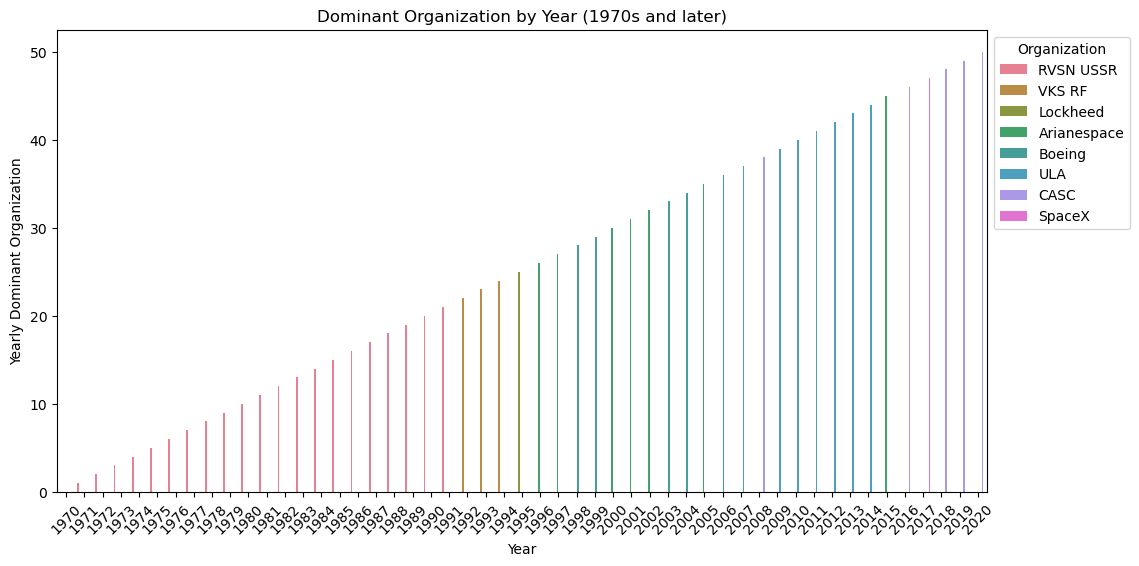

In [247]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Year', y=data.index, hue='Organization', palette=palette)
plt.xlabel('Year')
plt.ylabel('Yearly Dominant Organization')
plt.title('Dominant Organization by Year (1970s and later)')
plt.legend(title='Organization', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()